In [79]:
import pandas as pd
import numpy as np

df = pd.read_csv('datakt.csv', encoding='cp949')

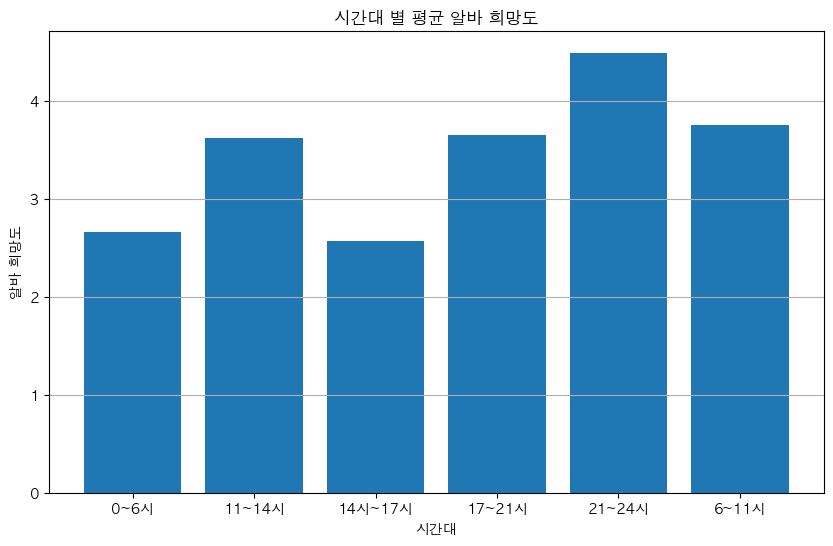

In [80]:
import matplotlib.pyplot as plt

# 애플 고딕 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'

# '주문량'을 시간대별로 그룹화하고 평균 계산
average_order_by_time = df.groupby('시간대')['알바 희망도'].mean()

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(average_order_by_time.index, average_order_by_time.values)
plt.title('시간대 별 평균 알바 희망도')
plt.xlabel('시간대')
plt.ylabel('알바 희망도')
plt.grid(axis='y')
plt.show()

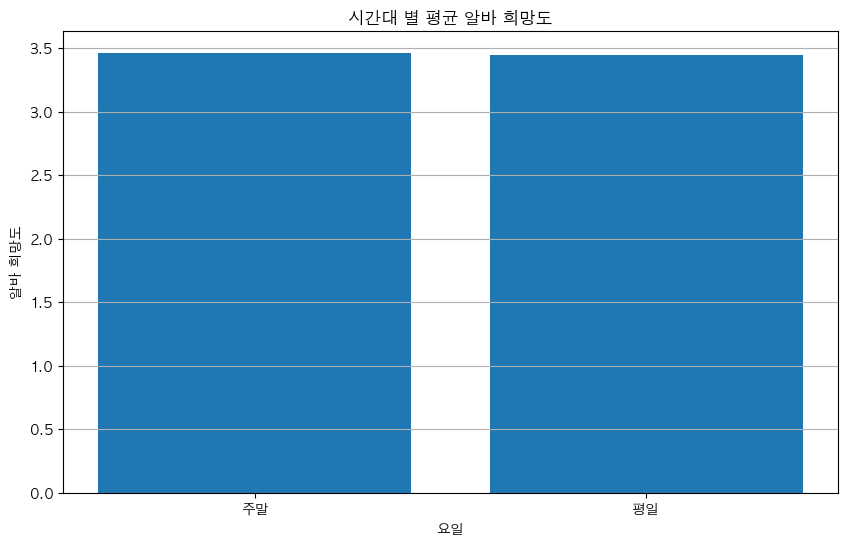

In [81]:
import matplotlib.pyplot as plt

# 애플 고딕 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'

# '주문량'을 시간대별로 그룹화하고 평균 계산
average_order_by_time = df.groupby('요일')['알바 희망도'].mean()

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(average_order_by_time.index, average_order_by_time.values)
plt.title('시간대 별 평균 알바 희망도')
plt.xlabel('요일')
plt.ylabel('알바 희망도')
plt.grid(axis='y')
plt.show()

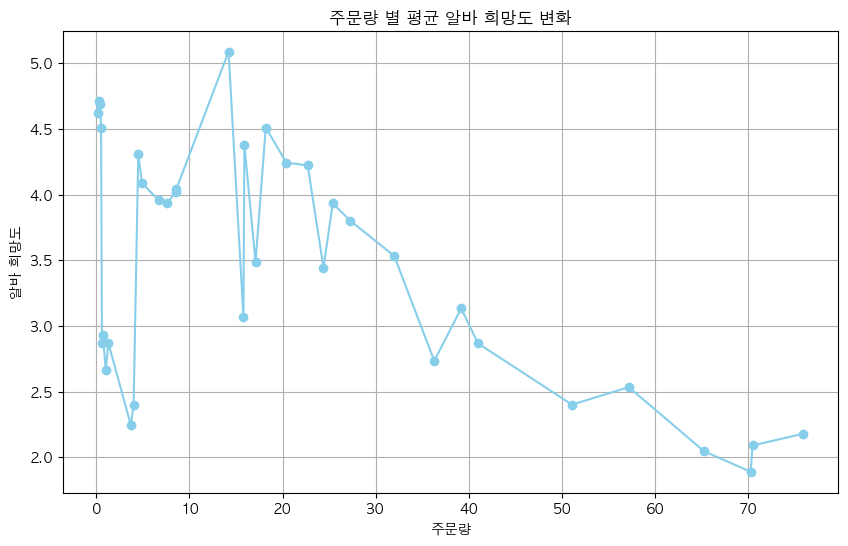

In [82]:
import matplotlib.pyplot as plt

# 애플 고딕 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'

# '주문량'을 시간대별로 그룹화하고 평균 계산
average_order_by_quantity = df.groupby('주문량')['알바 희망도'].mean()

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(average_order_by_quantity.index, average_order_by_quantity.values, marker='o', linestyle='-', color='skyblue')
plt.title('주문량 별 평균 알바 희망도 변화')
plt.xlabel('주문량')
plt.ylabel('알바 희망도')
plt.grid(True)
plt.show()


In [83]:
# Make sure '시간대' is converted to a string before concatenation
df['요일_시간대'] = df['요일'] + '_' + df['시간대'].astype(str)

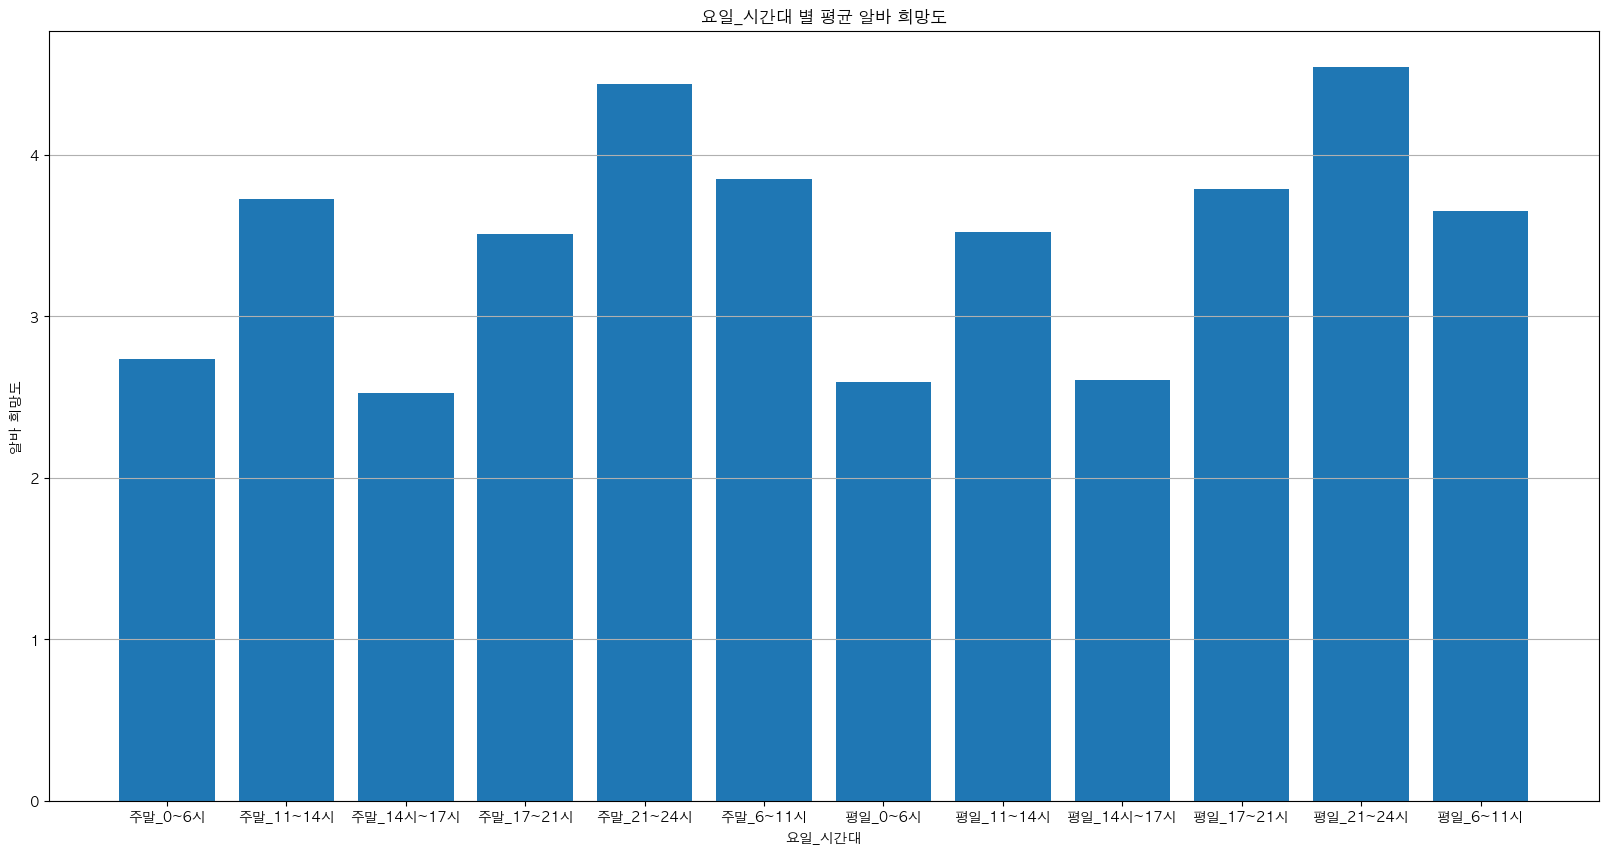

In [89]:
import matplotlib.pyplot as plt

# 애플 고딕 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'

# '주문량'을 시간대별로 그룹화하고 평균 계산
average_order_by_time = df.groupby('요일_시간대')['알바 희망도'].mean()

# 그래프 생성
plt.figure(figsize=(20, 10))
plt.bar(average_order_by_time.index, average_order_by_time.values)
plt.title('요일_시간대 별 평균 알바 희망도')
plt.xlabel('요일_시간대')
plt.ylabel('알바 희망도')
plt.grid(axis='y')
plt.show()

In [84]:
# '평일'을 0으로, '주말'을 1로 인코딩
df['요일'] = df['요일'].replace({'평일': 0, '주말': 1})

# '시간대'를 0에서 5까지 숫자로 인코딩
df['시간대'] = df['시간대'].replace({'0~6시': 0, '6~11시': 1 , '11~14시': 2 ,'14시~17시': 3 , '17~21시': 4 ,'21~24시': 4  })

In [72]:
df

,요일,시간대,주문량,알바 희망도
0,0,0,3.7,7
1,0,0,3.7,1
2,0,0,3.7,1
3,0,0,3.7,2
4,0,0,3.7,2
...,...,...,...,...
1615,1,4,0.3,4
1616,1,4,0.3,6
1617,1,4,0.3,3
1618,1,4,0.3,3


Random Forest Metrics:
Mean Squared Error: 4.208878296667794
Mean Absolute Error: 1.721692452993402
Root Mean Squared Error: 2.0515550922818995
R2 Score: 0.0776024198783759

Linear Regression Metrics:
Mean Squared Error: 3.988750563827211
Mean Absolute Error: 1.7186954814021622
Root Mean Squared Error: 1.9971856608305627
R2 Score: 0.12584455799165073

Support Vector Machine Metrics:
Mean Squared Error: 4.468390004791667
Mean Absolute Error: 1.6938844061179459
Root Mean Squared Error: 2.1138566660943847
R2 Score: 0.02072907864249285

K-Nearest Neighbors Metrics:
Mean Squared Error: 4.59604938271605
Mean Absolute Error: 1.8246913580246915
Root Mean Squared Error: 2.143839868720621
R2 Score: -0.0072481383206368655



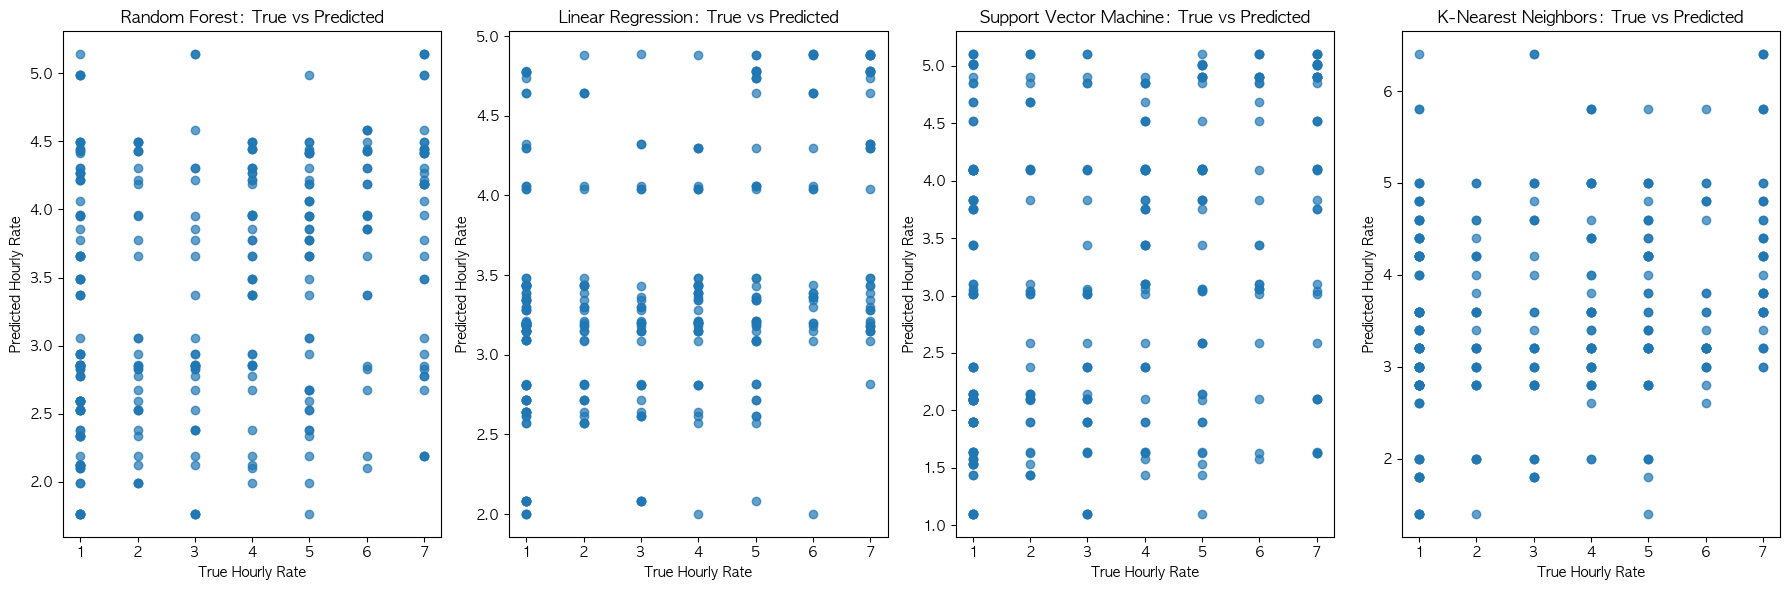

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 독립 변수와 종속 변수 설정
X = df.drop(['알바 희망도'], axis=1)
y = df['알바 희망도']
train_scaled = scaler.fit_transform(X)
X = pd.DataFrame(train_scaled, columns = X.columns)

# 학습 세트 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 선형 회귀
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# svm
svm_model = SVR()
svm_model.fit(X_train, y_train)

# K-최근접 이웃 회귀
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)


# 예측
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

#  오차 출력
def print_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Metrics:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R2 Score: {r2}\n')

print_metrics('Random Forest', y_test, rf_pred)
print_metrics('Linear Regression', y_test, lr_pred)
print_metrics('Support Vector Machine', y_test, svm_pred)
print_metrics('K-Nearest Neighbors', y_test, knn_pred)

# 회귀 정확성 시각화
plt.figure(figsize=(18, 6))

# Random Forest
plt.subplot(1, 4, 1)
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Hourly Rate')
plt.ylabel('Predicted Hourly Rate')

# Linear Regression
plt.subplot(1, 4, 2)
plt.scatter(y_test, lr_pred, alpha=0.7)
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Hourly Rate')
plt.ylabel('Predicted Hourly Rate')

# Support Vector Machine
plt.subplot(1, 4, 3)
plt.scatter(y_test, svm_pred, alpha=0.7)
plt.title('Support Vector Machine: True vs Predicted')
plt.xlabel('True Hourly Rate')
plt.ylabel('Predicted Hourly Rate')

# K-Nearest Neighbors
plt.subplot(1, 4, 4)
plt.scatter(y_test, knn_pred, alpha=0.7)
plt.title('K-Nearest Neighbors: True vs Predicted')
plt.xlabel('True Hourly Rate')
plt.ylabel('Predicted Hourly Rate')

plt.tight_layout()
plt.show()

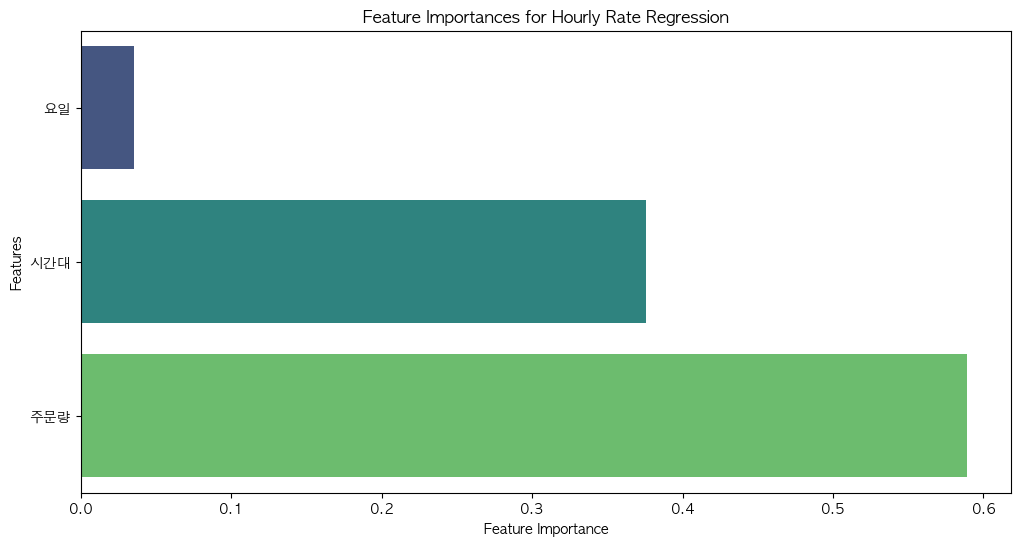

In [74]:
# 각 변수의 기여도 시각화
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features, orient='h', palette='viridis')
plt.title('Feature Importances for Hourly Rate Regression')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()